In [1]:
from __future__ import print_function 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


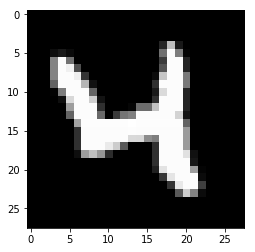

(60000, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.imshow(X_train[20], cmap='gray')
plt.show()

print(X_train.shape)
X_train = X_train.reshape(60000, X_train.shape[1]**2).astype('float32')/255
X_test = X_test.reshape(10000, X_test.shape[1]**2).astype('float32')/255
print(X_train.shape)
print(X_train)

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:',score[0])
print('Accuracy:',score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 6s 118us/step - loss: 0.3753 - acc: 0.8827 - val_loss: 0.1171 - val_acc: 0.9670
Epoch 2/40
54000/54000 [==============================] - 5s 99us/step - loss: 0.1724 - acc: 0.9477 - val_loss: 0.0943 - val_acc: 0.9710
Epoch 3/40
54000/54000 [==============================] - 16s 295us/step - loss: 0.1345 - acc: 0.9597 - val_loss: 0.0727 - val_acc: 0.9772
Epoch 4/40
54000/54000 [==============================] - 87s 2ms/step - loss: 0.1121 - acc: 0.9652 - val_loss: 0.0659 - val_acc: 0.9797
Epoch 5/40
54000/54000 [==============================] - 16s 300us/step - loss: 0.0987 - acc: 0.9702 - val_loss: 0.0672 - val_acc: 0.9802
Epoch 6/40
54000/54000 [==============================] - 13s 248us/step - loss: 0.0874 - acc: 0.9731 - val_loss: 0.0616 - val_acc: 0.9812
Epoch 7/40
54000/54000 [==============================] - 14s 263us/step - loss: 0.0823 - acc: 0.9741 - val_loss: 0.0583 -